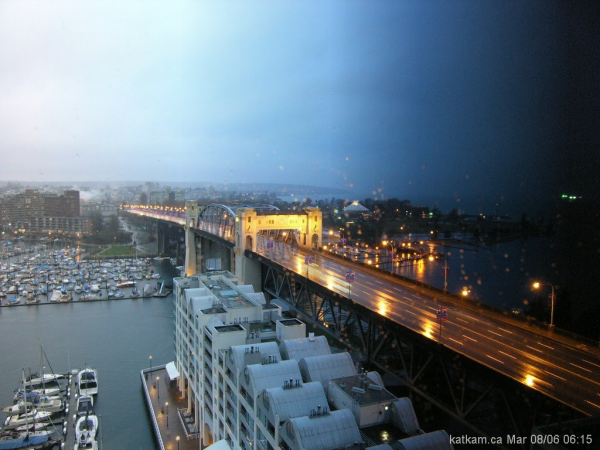

In [205]:
import numpy as np
from PIL import Image

def get_gradient_mask(current, num_images, size, transition_pixels):
    whites_size = (current+1)*(size[0]//num_images)-transition_pixels
    gradient_size = transition_pixels*2
    blacks_size = ((num_images-(current+1))*(size[0]//num_images))-transition_pixels
    
    whites = np.ones(whites_size, dtype=int)*255
    gradient = np.linspace(255, 0, gradient_size, dtype=int)
    blacks = np.zeros(blacks_size, dtype=int)
    
    transp_array = np.concatenate((whites, gradient, blacks))
    
    mask = Image.new("L", size)
    for x in range(mask.size[0]):
        for y in range(mask.size[1]):
            mask.putpixel((x,y), int(transp_array[x]))
    
    return mask

def get_gradient_masks(num_images, size, transition_pixels):
    masks = []
    for current in range(num_images-1):
        masks.append(get_gradient_mask(current, num_images, size, transition_pixels))
    
    return masks

def get_gradient_masks_from_imgs(imgs):
    return get_gradient_masks(len(imgs), imgs[0].size, (imgs[0].size[0])//len(imgs))

def get_gradient_masks_from_transition_pixels(imgs, transition_pixels):
    return get_gradient_masks(len(imgs), imgs[0].size, transition_pixels)

def composite_img(img1, img2, mask):
    return Image.composite(img1, img2, mask)

def composite_imgs(imgs, masks):
    current_image = imgs[0]
    for i in range(1,len(imgs)):
        current_image = Image.composite(current_image, imgs[i], masks[i-1])
    
    return current_image
        

img4 = Image.open("../samples/BurrandStreetBridge-Vancouver/20060308061500.jpg")
img3 = Image.open("../samples/BurrandStreetBridge-Vancouver/20060308062500.jpg")
img2 = Image.open("../samples/BurrandStreetBridge-Vancouver/20060308064500.jpg")
img1 = Image.open("../samples/BurrandStreetBridge-Vancouver/20060308070500.jpg")

imgs = [img1, img2, img3, img4]
#masks = get_gradient_masks_from_imgs(imgs)
masks = get_gradient_masks_from_transition_pixels(imgs, 120)

final_image = composite_imgs(imgs,masks)
final_image